# Bivariate visualizations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_csv('fuel-econ.csv')
df.head(3)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


# quanitative vs quanitative plots
## Scatter plots(quanitative vs quanitative)

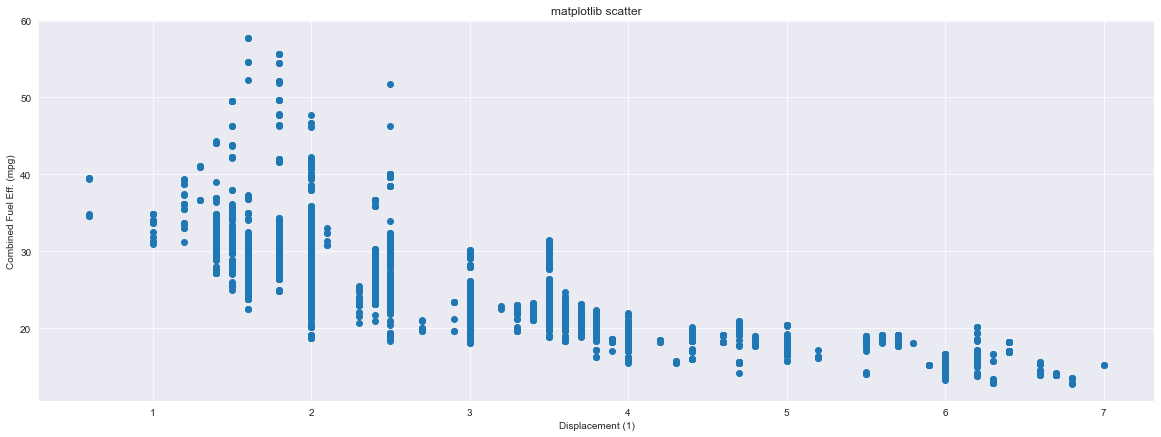

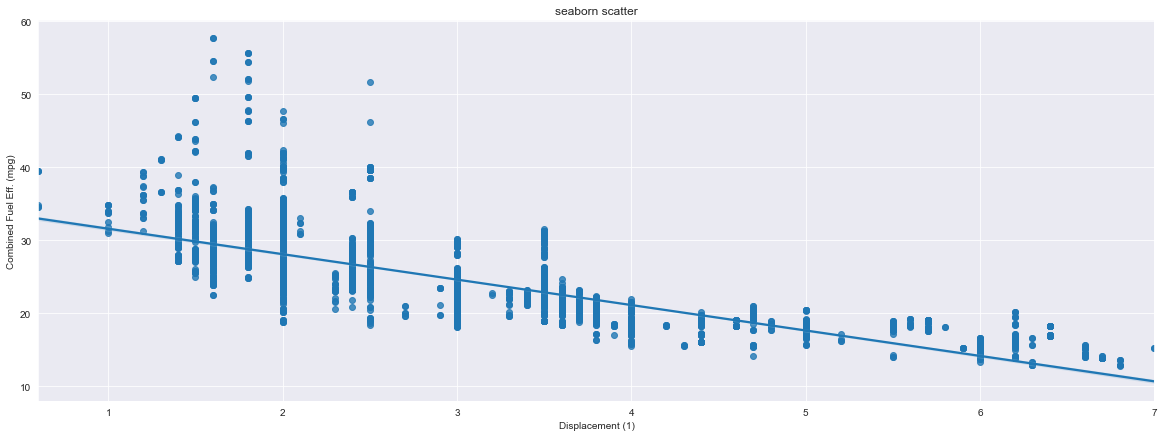

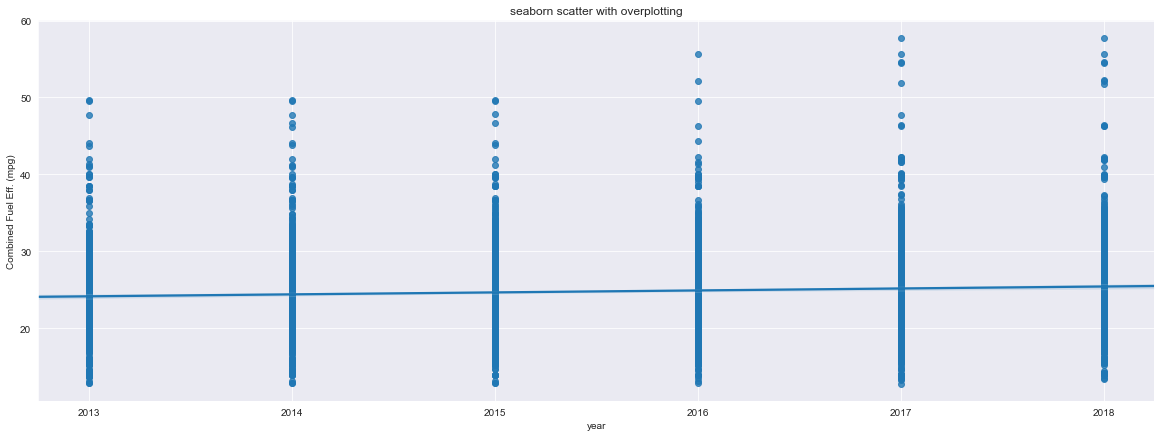

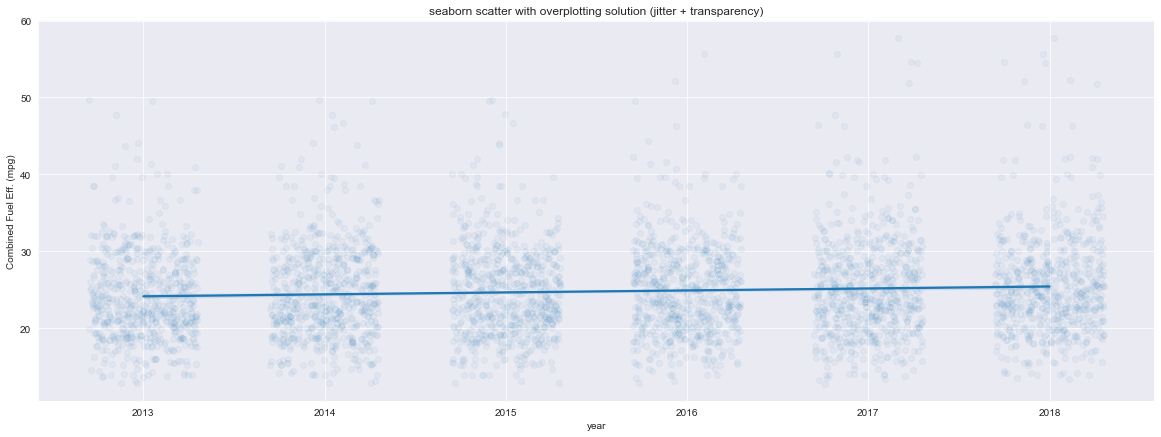

In [2]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.set_style('darkgrid')
#using plt
plt.scatter(x=df.displ,y=df.comb);
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('matplotlib scatter');
plt.show()
#using sns
sns.regplot(x=df.displ,y=df.comb)#to remove reg line use fit fit_reg=False
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('seaborn scatter');
plt.show()
#########
#overploting
sns.regplot(x=df.year,y=df.comb,truncate=False)#to remove reg line use fit fit_reg=False
plt.xlabel('year');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('seaborn scatter with overplotting');
plt.show()
#solving overploting using jitter and transparency
sns.regplot(x=df.year,y=df.comb,x_jitter=0.3,scatter_kws={'alpha':1/20})#to remove reg line use fit fit_reg=False
plt.xlabel('year');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('seaborn scatter with overplotting solution (jitter + transparency)');
plt.show()

## heat map plots(quanitative vs quanitative) 
**Heat maps are useful in the following cases:**    
1-To represent a plot for discrete vs. another discrete variable    
2-As an alternative to transparency when the data points are enormous

             displ         comb
count  3929.000000  3929.000000
mean      2.950573    24.791339
std       1.305901     6.003246
min       0.600000    12.821700
25%       2.000000    20.658100
50%       2.500000    24.000000
75%       3.600000    28.227100
max       7.000000    57.782400


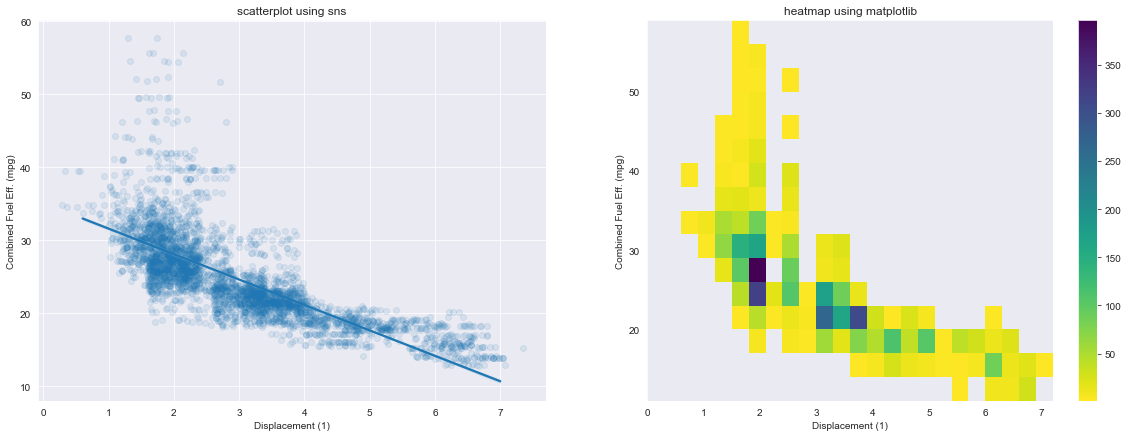

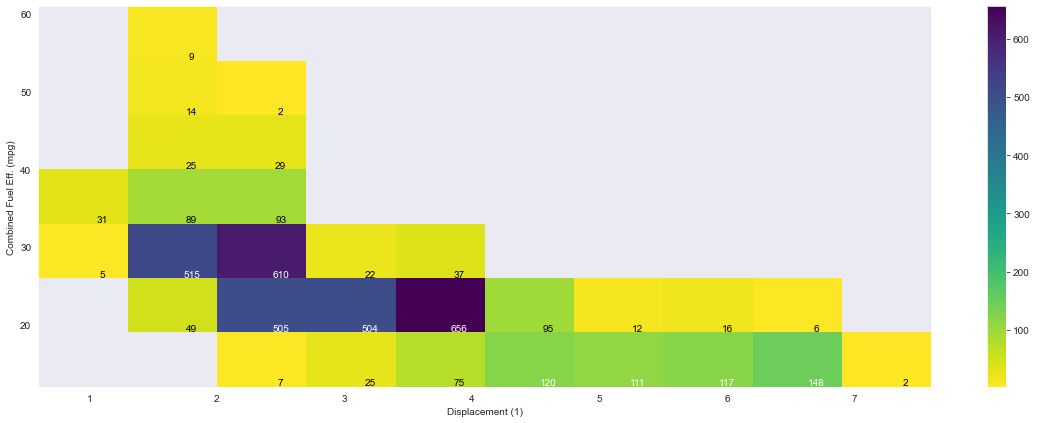

In [3]:
#using plt
plt.subplot(1,2,1)
sns.regplot(x=df.displ,y=df.comb,x_jitter=0.4,scatter_kws={'alpha':1/10});
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('scatterplot using sns');

plt.subplot(1,2,2)
print(df[['displ','comb']].describe())# to get the appropriate bins for x and y
x_bins=np.arange(0 , 7+0.3  , 0.3)
y_bins=np.arange(11 , 60 , 3)
plt.hist2d(x=df.displ,y=df.comb,bins=[x_bins,y_bins],cmin=0.5,cmap='viridis_r');
plt.colorbar();
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title('heatmap using matplotlib');
plt.show()
########################
#Annotations on each cell

# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Line Plots(quanitative vs quanitative) 
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable.     
* we need to do some aggregation inorder to have one y value for each one x value

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64


<ErrorbarContainer object of 3 artists>

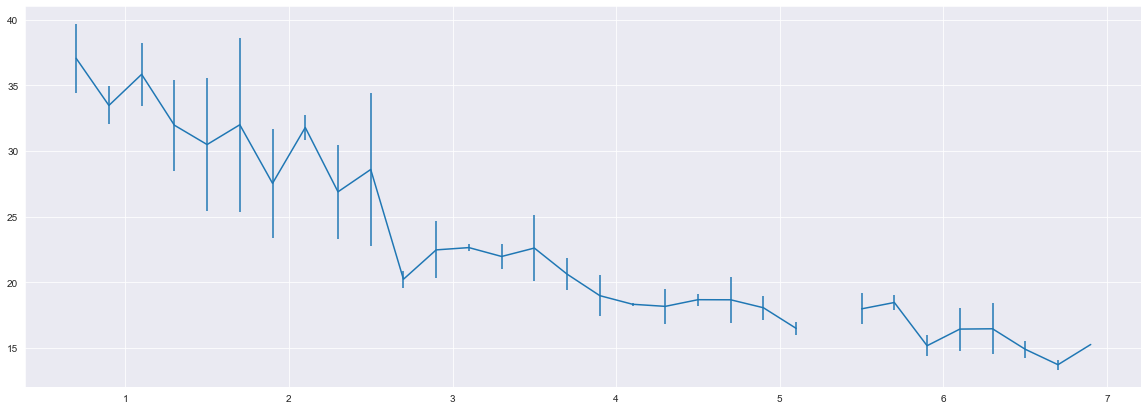

In [4]:
# displ vs comb
#use pandas.cut to change displ into slices based on bins
print(df.displ.describe())
bins_edges=np.arange(0.6, 7+.2, .2)
bins_center=bins_edges[:-1]+.1
new_displ=pd.cut(df.displ,bins_edges,include_lowest=True)
comb_mean=df.groupby(new_displ)['comb'].mean()
comb_std=df.groupby(new_displ)['comb'].std()
plt.errorbar(x=bins_center,y=comb_mean,yerr=comb_std)# yerr=comb_std is to plot std aswell


## Q-Q plot or quantile-quantile plot (quanitaive vs quanitative)
**In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.**
* **If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x.**  

**One way we could approach this is through a statistical test, such as using scipy's shapiro function to perform the Shapiro-Wilk test.**
### **We Q-Q plots to make a visual comparison between your data and your reference distribution**

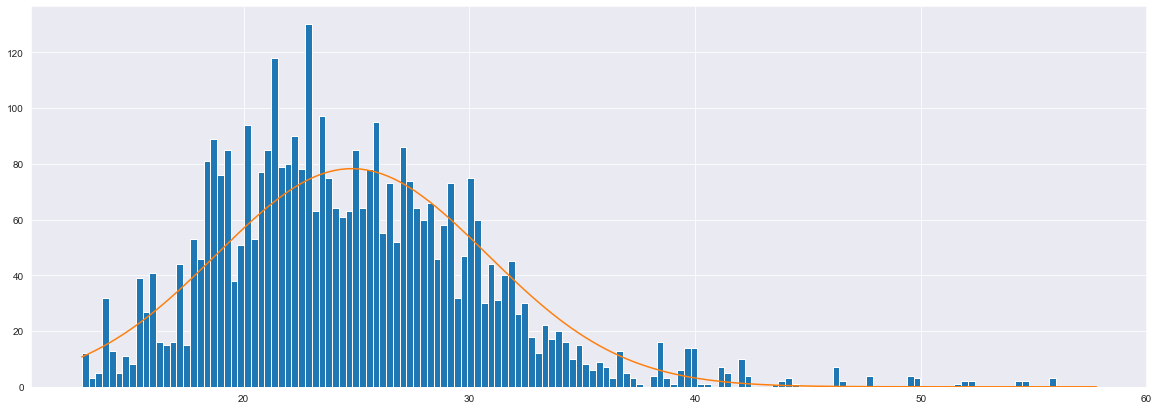

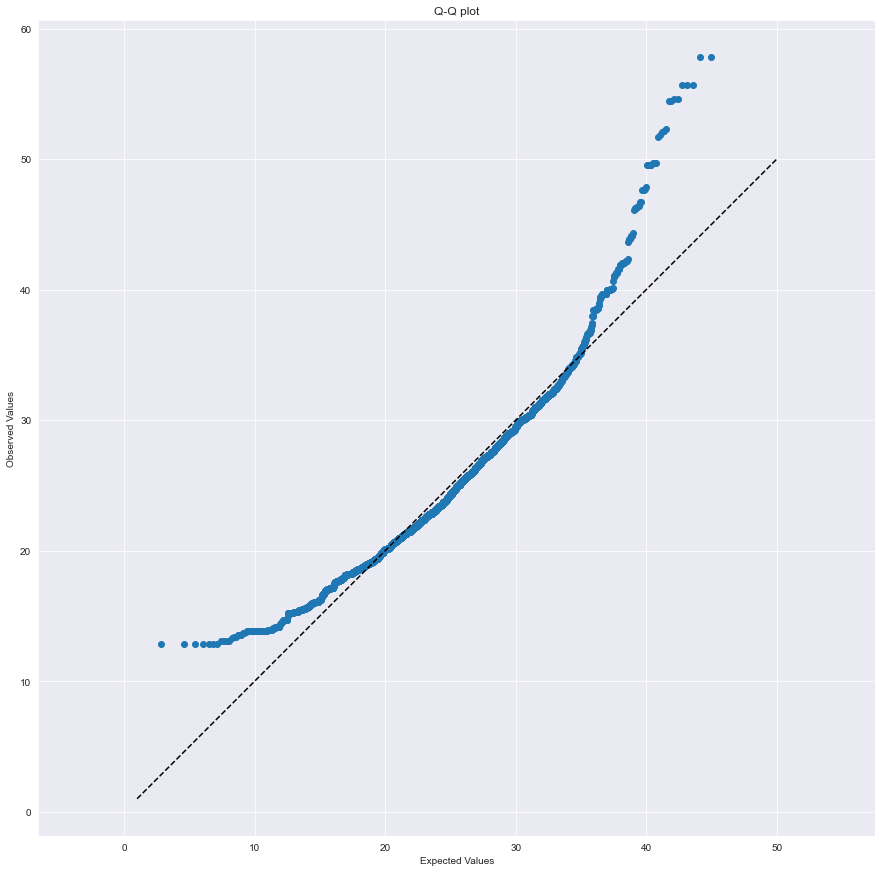

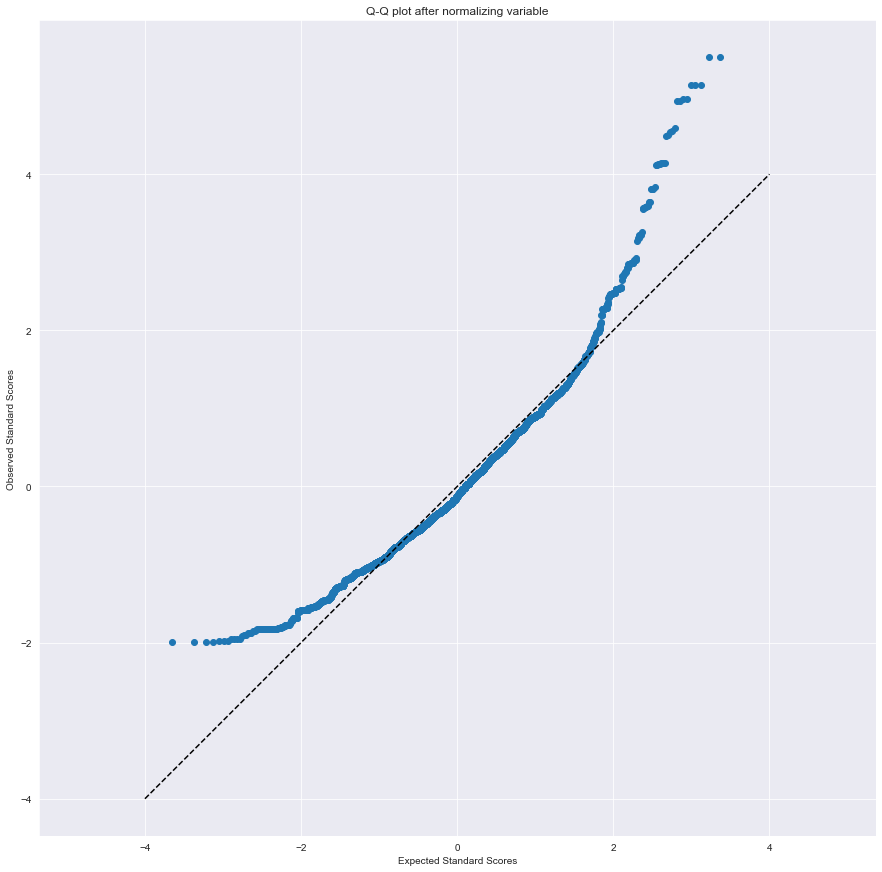

/Users/3m/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1080x1080 with 0 Axes>

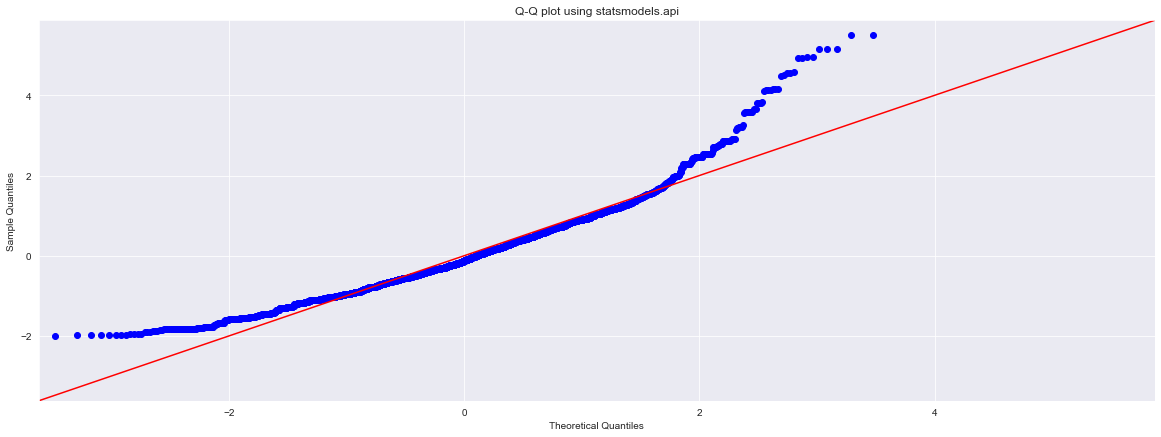

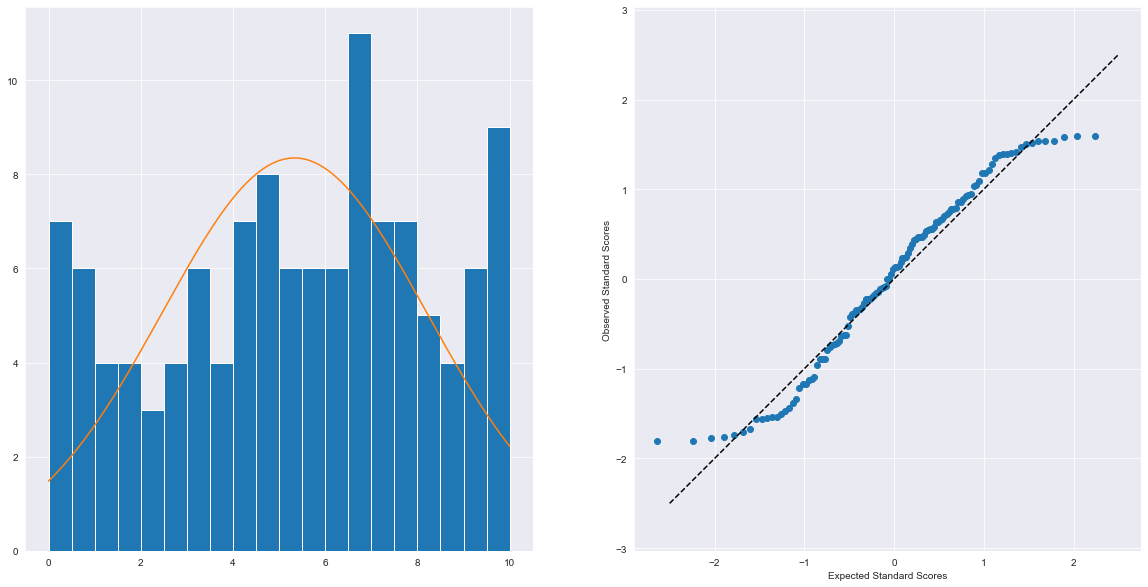


 shapiro-test(test of normality)for-our variable: ShapiroResult(statistic=0.9505742788314819, pvalue=1.7480505576364571e-34)


In [5]:
####################################################################
# hist df.comb and simulate a normal PDF and compare them          #
######################  THIS IS NOT Q-Q PLOT  ######################
####################################################################
import scipy.stats as sc
from scipy.stats import norm
# create a histogram of the data
var=df.comb
bin_size = (var.max()-var.min())/150
bin_edges = np.arange(var.min(), var.max() + bin_size, bin_size)
plt.hist(data = df, x = 'comb', bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = df['comb'].mean()
samp_sd = df['comb'].std()
x = np.linspace(var.min(), var.max(), 150)# generate x-values across the range of the plot
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= var.shape[0] * bin_size # scale the distribution height
plt.plot(x,y)
plt.show()

#####################################################################################################################
'''we could compare how large the _k_-th ranked data point is against the _k_-th ranked point from the expected distribution.
To get these expected values, we'll make use of the norm class's ppf function,
which stands for percent point function. The ppf takes as input a proportion (valued between 0 and 1) 
and returns the value in the distribution that would leave that proportion of the curve to the left.
For a standard normal distribution (mean = 0, standard deviation = 1), the ppf(0.25) = -0.674ppf(0.25)=−0.674, ppf(0.5) = 0
ppf(0.5)=0, and ppf(0.75) = 0.674ppf(0.75)=0.674. The main question, then, is what values to stick into the ppf.
There's a few different conventions around this, but they generally take the form of the following equation:
Given _n_ data points, the _k_-th value should be at probability point (k-a)/(n+1-2a), for some _a_ between 0 and 1 (inclusive).
This equation distributes the probability points symmetrically about 0.5, 
and adjusting _a_ changes how much probability is left in the tails of the [0,1] range. 
Commonly, _a_ is set to a balanced value of 0.5, which gives the equation (k-0.5)/(n)

 . Let's put this all together using code: '''
#####################################################################################################################
######################   Q-Q PLOT  ######################
figure=plt.figure(figsize=(15, 15))
n_points = len(var)
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)
plt.scatter(expected_vals, var.sort_values())
plt.plot([1,50],[1,50],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')
plt.title('Q-Q plot')
plt.show()
#####################################################################################################################
'''Usually, the Q-Q plot is computed and rendered in terms of standardized units, rather than the scale of the original data. 
A standardized dataset has a mean of 0 and standard deviation of 1, so to convert a set of values into standard scores, 
we just need to subtract the sample mean from each value to center it around 0, then divide by the sample standard deviation to scale it. 
Calling methods of the norm class without arguments for the mean or standard deviation assume the standard normal distribution. 
The code changes as follows:'''
#####################################################################################################################
figure=plt.figure(figsize=(15, 15))
expected_scores = norm.ppf(qs)#default muo=0 std=1
data_scores = (var.sort_values() - samp_mean) / samp_sd #normalize our variable
plt.scatter(expected_scores, data_scores)
plt.plot([-4,4],[-4,4],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')
plt.title('Q-Q plot after normalizing variable')
plt.show()
#####################################################################################################################
######################   Q-Q PLOT using statsmodels.api  ######################
figure=plt.figure(figsize=(15, 15))
import statsmodels.api as sm
import pylab as py
data_points = (var-var.mean())/var.std()
sm.qqplot(data_points, line ='45')
plt.title('Q-Q plot using statsmodels.api')
py.show()
#####################################################################################################################
######################   Q-Q PLOT full example  ######################
# compare uniform distribution to normal one
# generate the data
np.random.seed(8322489)
n_points = 120
unif_data = np.random.uniform(0, 10, n_points)
# set up the figure
plt.figure(figsize = [20, 10])
# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()
from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')
plt.show()
#####################################################################################################################
print('\n','shapiro-test(test of normality)for-our variable:', sc.shapiro(var))

## Rug Plot(quanitaive vs quanitative)
**In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.**

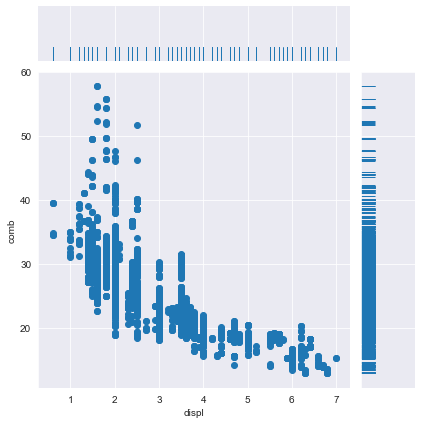

In [6]:
g = sns.JointGrid(x=df.displ,y=df.comb)
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height = 0.25)

# quanitative vs qualitative plots

## Violin Plots (quantitative and qualitative)
**The distribution is plotted as a kernel density estimate, something like a smoothed histogram.**

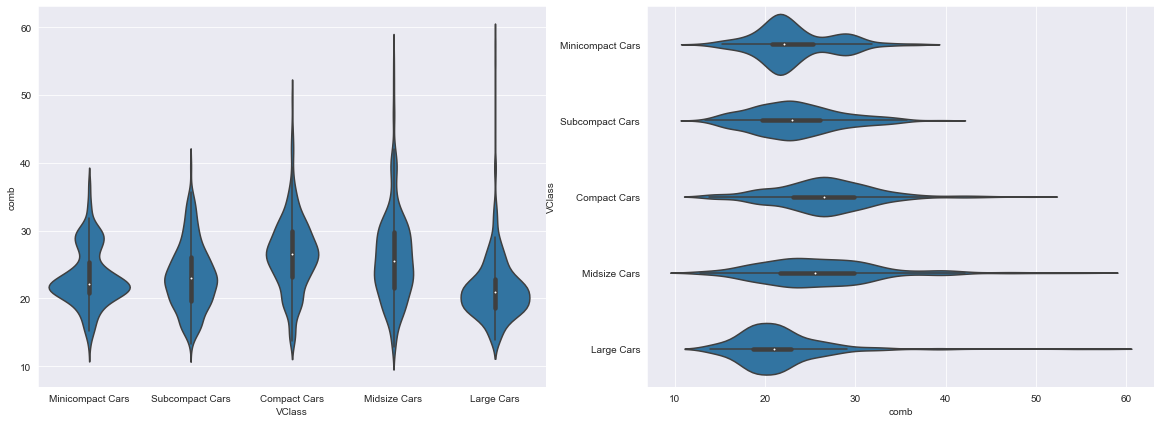

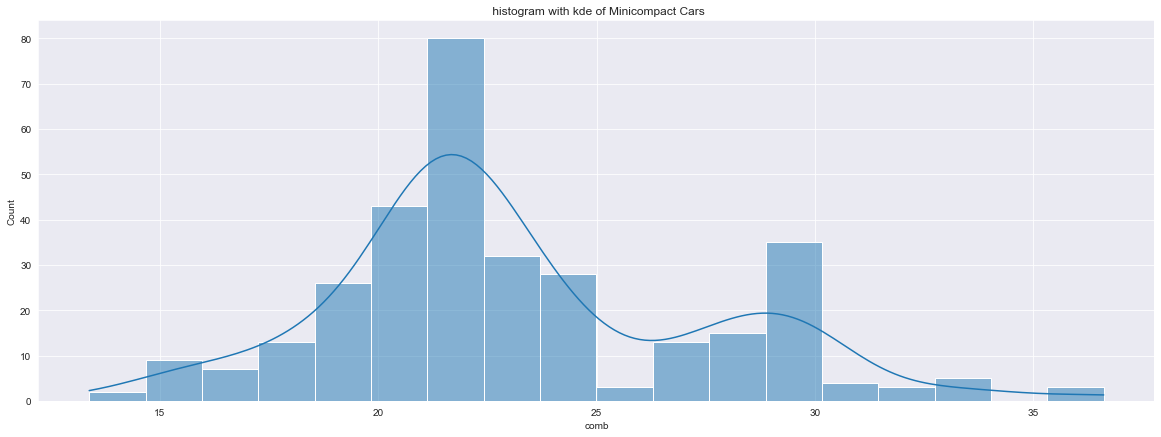

In [7]:
#optional to order classes
classes=['Minicompact Cars','Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses=pd.api.types.CategoricalDtype(categories=classes, ordered=True)
df.VClass=df.VClass.astype(vclasses)
#########################
basecolor=sns.color_palette()[0]
plt.subplot(1,2,1)
sns.violinplot(x=df.VClass,y=df.comb,color=basecolor);# use inner=None to remove boxplot from the center
plt.subplot(1,2,2)
sns.violinplot(y=df.VClass,x=df.comb,color=basecolor);# use inner=None to remove boxplot from the center
plt.show()
## violin plot plot the probability density distribution of each category
## to verify plot the histogram with kde using seaborn
sns.histplot(df[df.VClass=='Minicompact Cars'].comb,kde=True);
plt.title(' histogram with kde of Minicompact Cars' );


## Box Plots (quantitative and qualitative)    
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics **(5-number summary)** for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot() function.

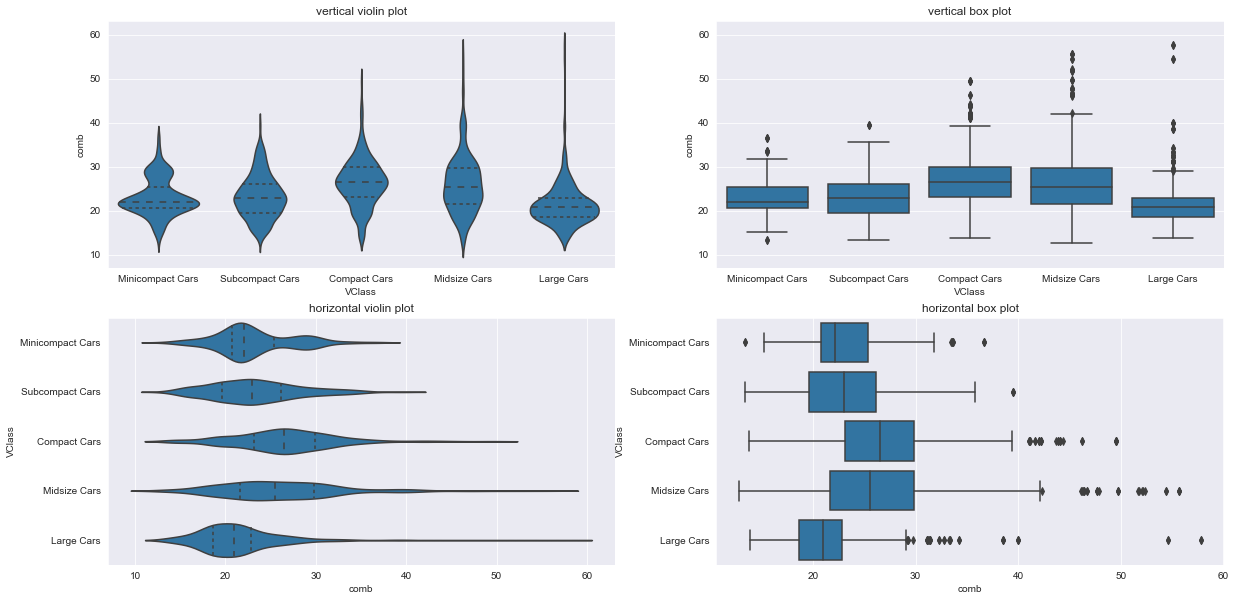

In [8]:
#optional to order classes
classes=['Minicompact Cars','Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses=pd.api.types.CategoricalDtype(categories=classes, ordered=True)
df.VClass=df.VClass.astype(vclasses)
#########################
basecolor=sns.color_palette()[0]
plt.figure(figsize=(20,10))
### vertical violin plot
plt.subplot(2,2,1)
ax=sns.violinplot(x=df.VClass,y=df.comb,color=basecolor,inner='quartile');# use inner=None to remove quartiles from the center
plt.title('vertical violin plot')
### vertical box plot
plt.subplot(2,2,2)
sns.boxplot(x=df.VClass,y=df.comb,color=basecolor)
plt.ylim(ax.get_ylim())
plt.title('vertical box plot')
### horizontal violin plot
plt.subplot(2,2,3)
sns.violinplot(y=df.VClass,x=df.comb,color=basecolor,inner='quartile');# use inner=None to remove boxplot from the center
plt.title('horizontal violin plot')
### horizontal box plot
plt.subplot(2,2,4)
sns.boxplot(y=df.VClass,x=df.comb,color=basecolor);# use inner=None to remove boxplot from the center
plt.title('horizontal box plot');


## swarm Plots (quantitative and qualitative)    
**it is only reasonable to use a swarm plot if we have a small or moderate amount of data. If we have too many points, then the restrictions against overlap will cause too much distortion or require a lot of space to plot the data comfortably. In addition, having too many points can actually be a distraction, making it harder to see the key signals in the visualization. Use your findings from univariate visualizations to inform which bivariate visualizations will be best, or simply experiment with different plot types to see what is most informative.**
* **below is a bad examble but just for demoing**

/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorica

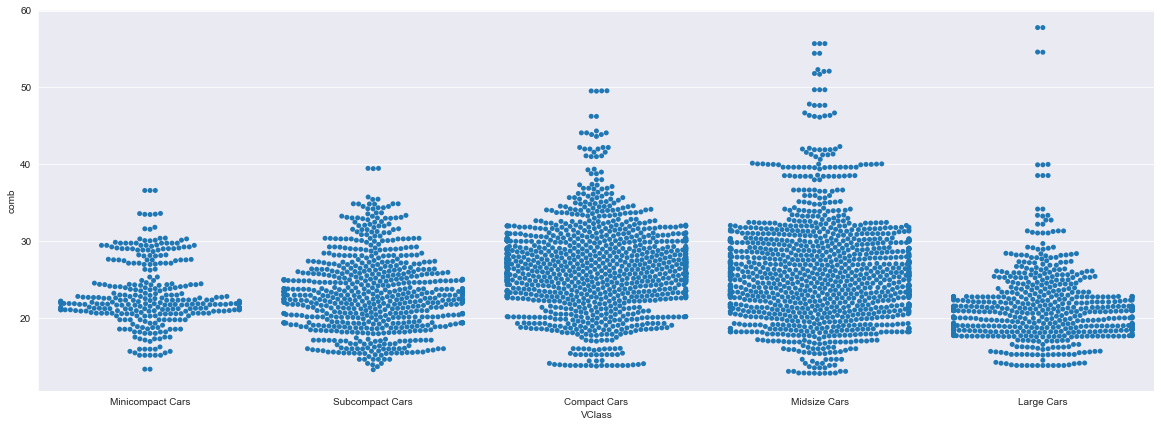

/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/categori

(6.966470319355814, 63.09321945242605)

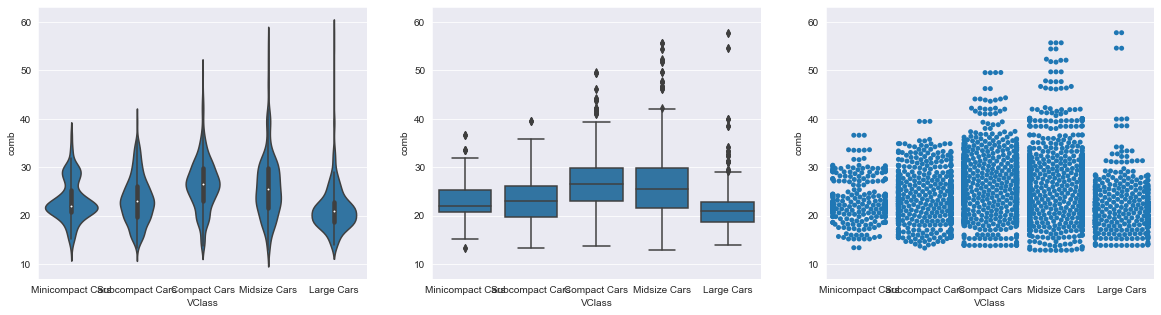

In [9]:
basecolor=sns.color_palette()[0];
sns.swarmplot(x=df.VClass,y=df.comb,color=basecolor);
plt.show()
###### violin,box,swarm ######
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(x=df.VClass,y=df.comb,color=basecolor)

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df.VClass,y=df.comb,color=basecolor)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sns.swarmplot(x=df.VClass,y=df.comb,color=basecolor)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## Adaptation of Univariate Plots for Bivariate Plots (quantitative and qualitative)


## facetting(quantitative and qualitative)


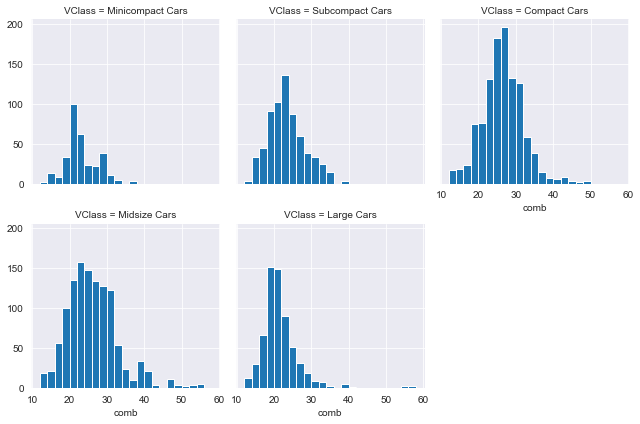

In [10]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = df, col = 'VClass', col_wrap=3)#for independent y-axis for each plot set sharey=False
g.map(plt.hist, 'comb', bins = bin_edges);

**alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.**

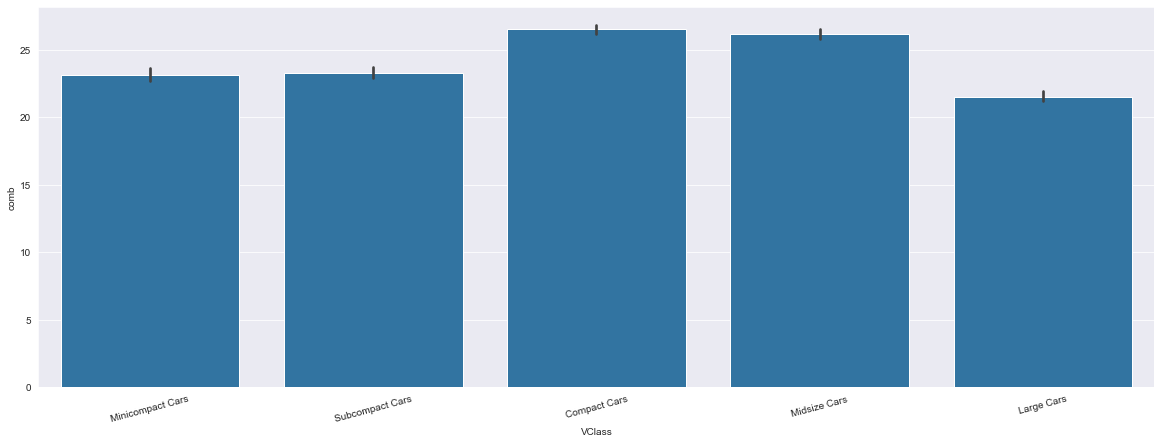

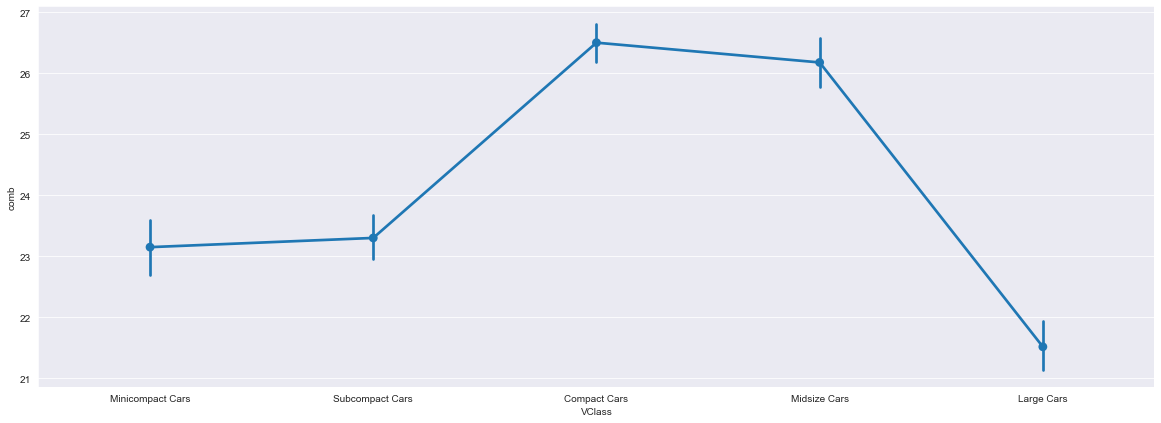

<AxesSubplot:xlabel='VClass', ylabel='comb'>

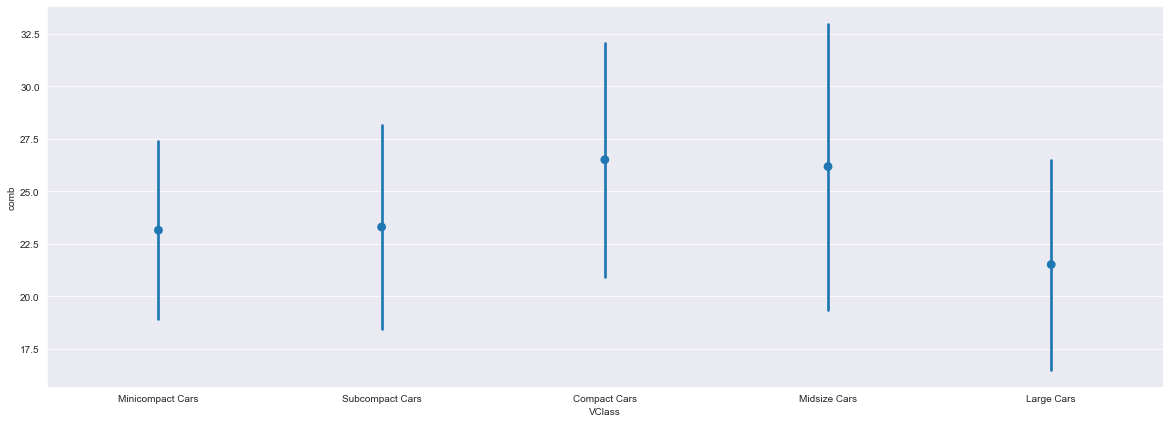

In [11]:
#Using sns barplot function to plot means of variables instead of frequency
base_color=sns.color_palette()[0]
sns.barplot(x=df.VClass,y=df.comb,color=base_color)
#############################################################################################################
# The bar heights indicate the mean value on the numeric variable,                                          #
# with error bars plotted in black to show the uncertainty in the mean based on variance and sample size    #
# CI: Size of confidence intervals to draw around estimated values. If “sd”, skip bootstrapping and draw    #
# the standard deviation of the observations. If None, no bootstrapping will be performed,                  #
# and error bars will not be drawn.                                                                         #
# to remove error bars specify (errwidth=0), to plot std instead of mean specify (ci='sd')                  #
#############################################################################################################
plt.xticks(rotation=15)
plt.show();
#############################################################################################################
# As an alternative, the pointplot() function can be used to plot the averages as points rather than bars.  #
#############################################################################################################
sns.pointplot(x=df.VClass,y=df.comb)
plt.show()
# to remove connected line use (linestyles=""),to plot std instead of mean specify (ci='sd') 
sns.pointplot(x=df.VClass,y=df.comb,linestyles="",ci='sd')


## Ridgeline Plots(quantitative and qualitative)
**In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes.**

/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


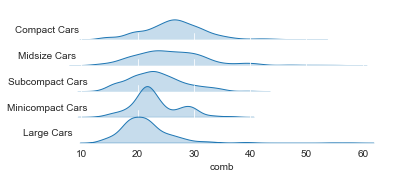

In [12]:
#### ref: https://seaborn.pydata.org/examples/kde_ridgeplot.html
group_means = df.groupby(['VClass']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index


g = sns.FacetGrid(data = df, row = 'VClass', height = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})##to make the overlab
g.map(sns.kdeplot, 'comb', shade = True)

g.set(yticks=[])#remove the ticks through
g.despine(left=True)# remove the y-axis through the


# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'VClass')
g.set_xlabels('comb')
g.set_titles('')


## strip plot
**It's like a swarm plot but without any dodging or jittering to keep points separate or off the categorical line.**

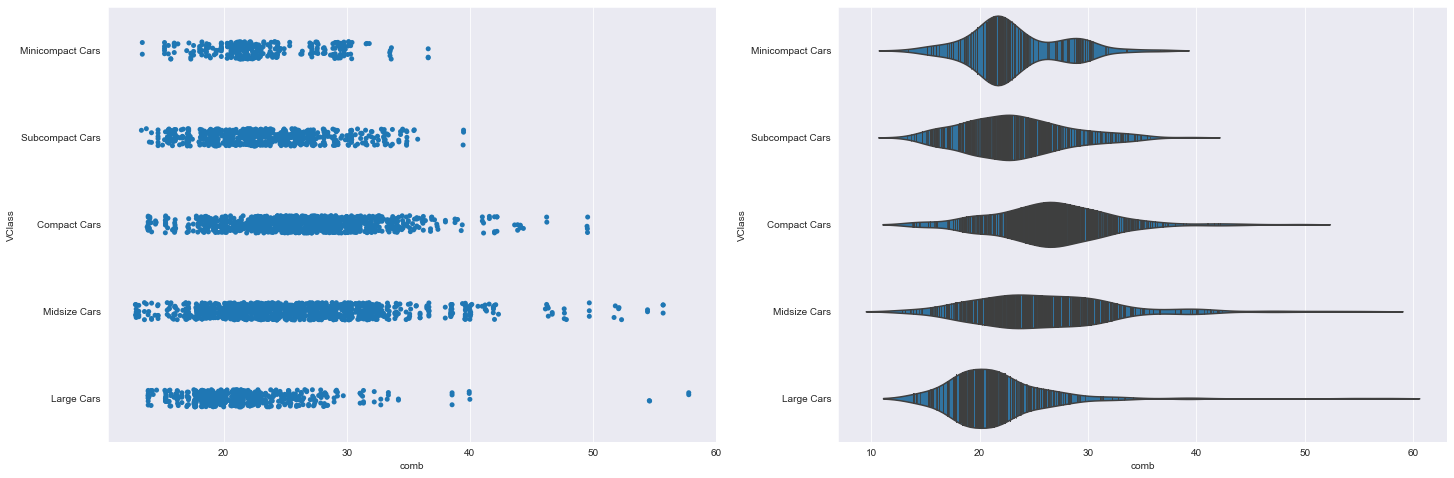

In [13]:
plt.figure(figsize = [24, 8])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(x=df.comb,y=df.VClass,color = base_color)
# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sns.violinplot(x=df.comb,y=df.VClass, color = base_color,inner = 'stick');

# qualitative vs qualitative plots

## Clustered Bar Charts(  categorical vs categorical)


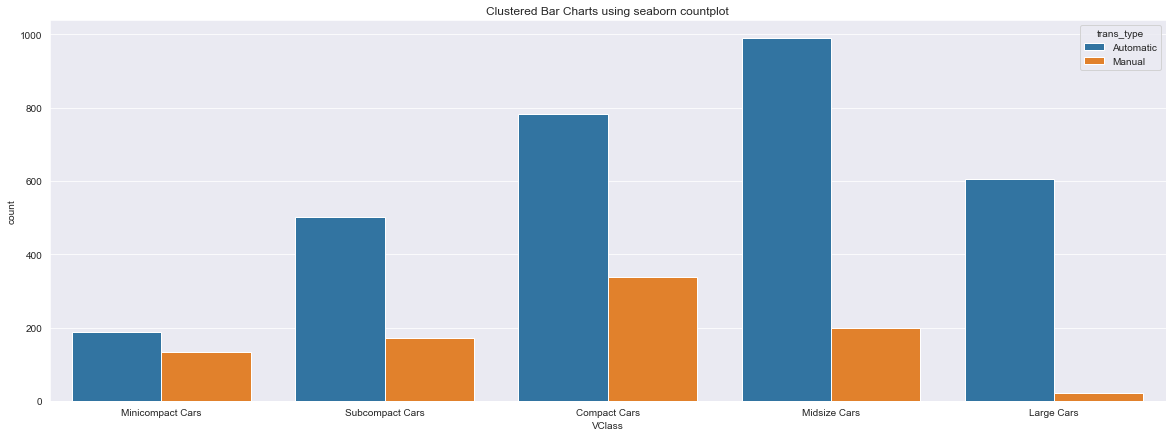

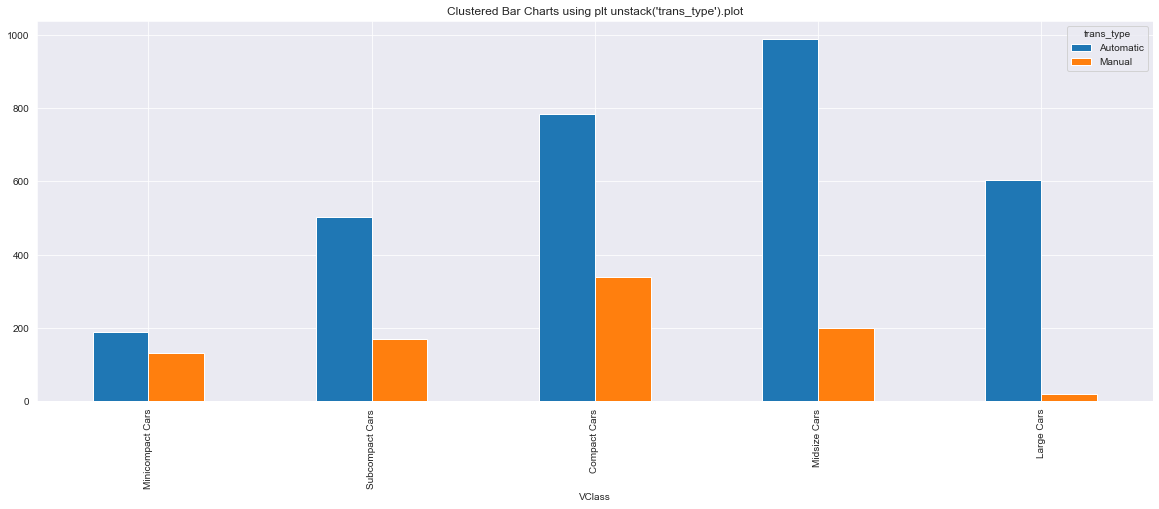

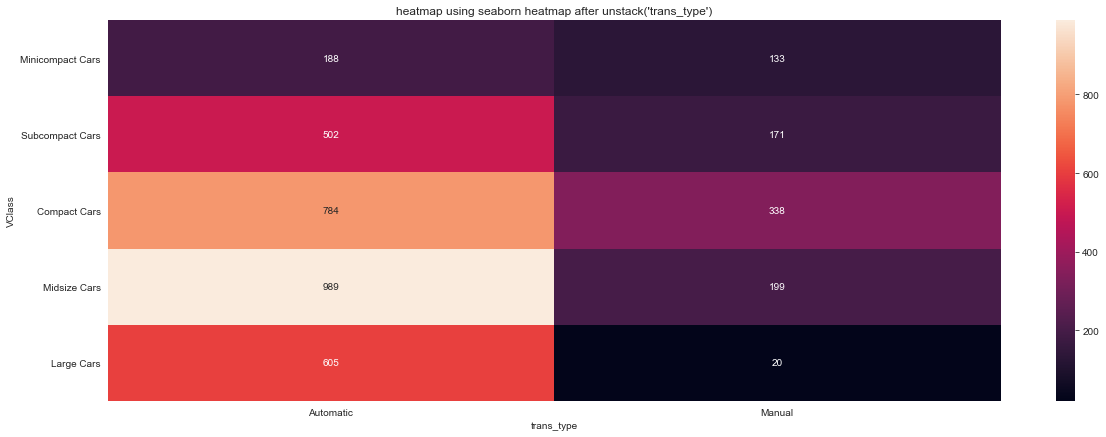

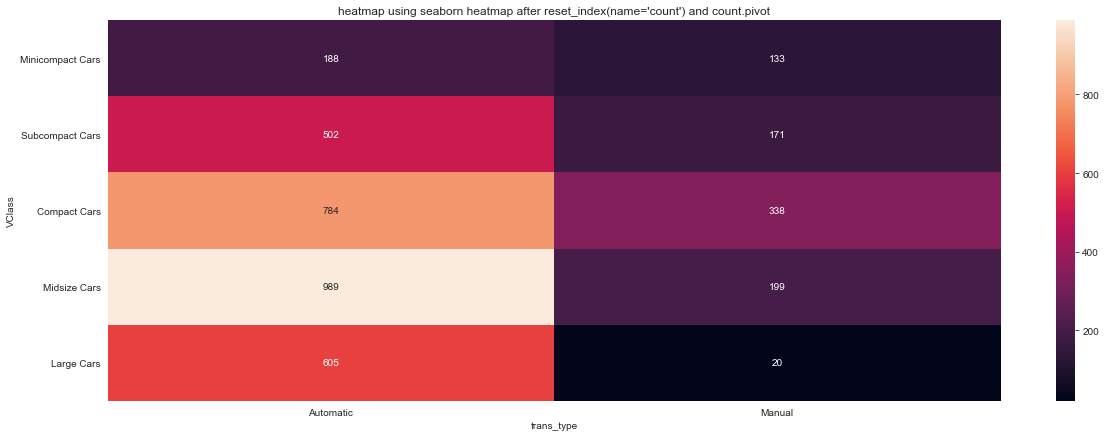

In [14]:
##optional
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses);
#############################
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])
sns.countplot(data=df,x='VClass',hue='trans_type');
plt.title('Clustered Bar Charts using seaborn countplot')
plt.show()
#############################
#another way
count=df.groupby(['VClass','trans_type']).size()
count.unstack('trans_type').plot(kind='bar')
plt.title("Clustered Bar Charts using plt unstack('trans_type').plot")
plt.show()
#############################
# #using heat map
sns.heatmap(count.unstack('trans_type'), annot = True, fmt = 'd')
plt.title("heatmap using seaborn heatmap after unstack('trans_type')")
plt.show()
#############################
#another way
count=count.reset_index(name='count')
count=count.pivot(index='VClass',columns='trans_type',values='count')
sns.heatmap(count, annot = True, fmt = 'd');
plt.title("heatmap using seaborn heatmap after reset_index(name='count') and count.pivot");

##########
#annot = True makes it so annotations show up in each cell,
#but the default string formatting only goes to two digits of precision.
#Adding fmt = 'd' means that annotations will all be formatted as integers instead.
#You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.
##########


## Stacked Plots ( categorical vs categorical)
**The stacked bar chart plotted by absolute frequency carries one big advantage over the clustered bar chart: for the variable plotted on the x-axis, it's clear which category level has the highest frequency**    
**The disadvantage of the stacked bar chart comes with interpretation of the second, stacked variable. If you want to compare the relative counts of this second variable across levels of the first, you can really only do that for the category plotted on the baseline.**    
**This major limitation is a big reason why other plot types like clustered bar or line charts are often preferable to stacking.**

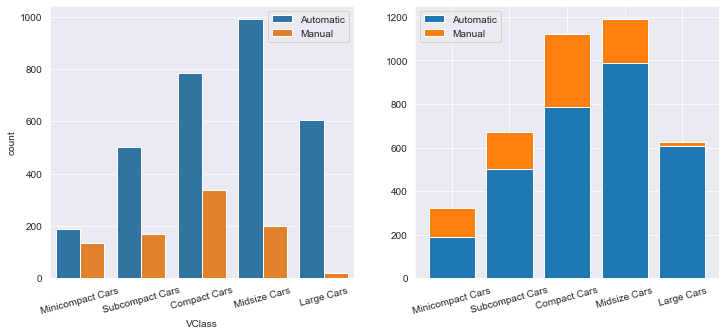

In [15]:
##optional
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses);
#############################
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

cat1_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
cat2_order = ['Automatic','Manual']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'VClass', hue = 'trans_type',
             order = cat1_order, hue_order = cat2_order)
plt.legend()
plt.xticks(rotation=15)
# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)

baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['trans_type'] == cat2]['VClass'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)
plt.xticks(rotation=15);


<AxesSubplot:xlabel='VClass'>

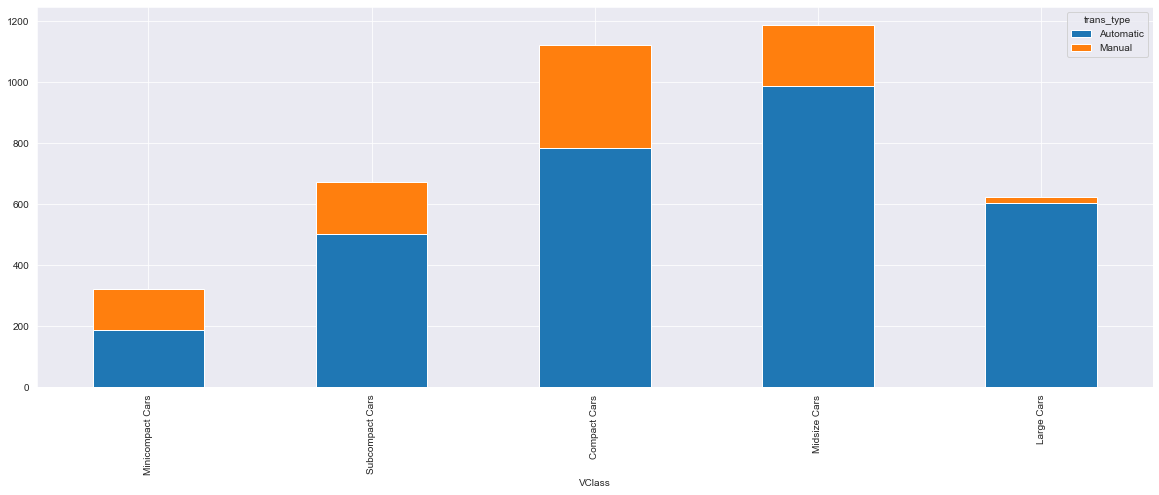

In [18]:

df.groupby(['VClass','trans_type']).size().unstack('trans_type').plot(kind='bar', stacked=True)